In [1]:
import warnings
warnings.filterwarnings('ignore')

from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Define the three-qubit bit-flip code circuit
def bit_flip_code():
    # Create a quantum circuit with 3 qubits and 3 classical bits
    qc = QuantumCircuit(3, 3)

    # Step 1: Encoding (using 3 qubits to protect 1 logical qubit)
    qc.h(0)  # Apply Hadamard gate to qubit 0 (superposition)
    qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
    qc.cx(0, 2)  # Apply CNOT gate between qubit 0 and qubit 2

    # Step 2: Simulate an error (bit-flip error on qubit 1)
    qc.x(1)  # Apply X gate (bit-flip) to qubit 1

    # Step 3: Error correction
    qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
    qc.cx(0, 2)  # Apply CNOT gate between qubit 0 and qubit 2
    qc.ccx(2, 1, 0)  # Apply Toffoli gate to perform majority vote (error correction)

    # Step 4: Measurement
    qc.measure([0, 1, 2], [0, 1, 2])  # Measure all qubits and store the result in classical bits

    return qc

# Simulate the circuit and plot the results
def simulate_circuit(circuit):
    # Use the Aer simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(circuit, simulator)

    # Assemble the transpiled circuit for the simulator
    qobj = assemble(transpiled_circuit)

    # Execute the circuit on the simulator
    result = simulator.run(qobj).result()

    # Get the counts of the measurement outcomes
    counts = result.get_counts(transpiled_circuit)
    return counts

if __name__ == "__main__":
    # Create and run the circuit
    circuit = bit_flip_code()
    counts = simulate_circuit(circuit)

    # Plot the measurement outcomes
    print("Measurement outcomes:")
    print(counts)
    plot_histogram(counts)


Measurement outcomes:
{'010': 520, '011': 504}


Measurement results: {'0000000': 1024}


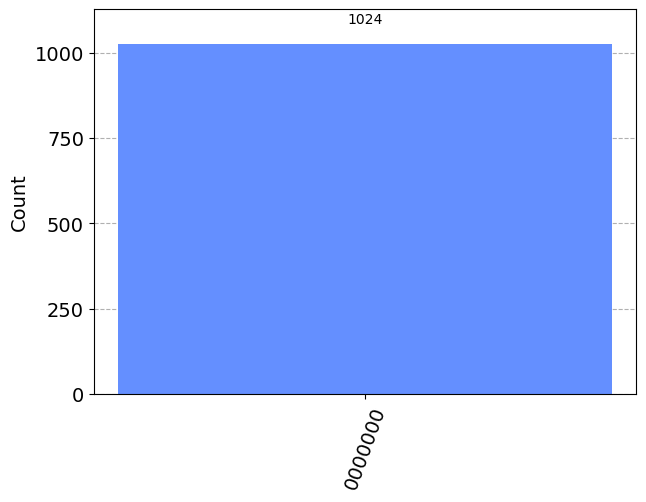

In [3]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.visualization import plot_histogram

# Create a 7-qubit quantum circuit for the Steane code
code = QuantumCircuit(7, 7)

# Encoding step (apply 7-qubit encoding gates)
code.cx(0, 3)
code.cx(0, 5)
code.cx(1, 3)
code.cx(1, 6)
code.cx(2, 4)
code.cx(2, 6)
code.barrier()

# Simulate a bit-flip error on qubit 3
error = errors.depolarizing_error(0.1, 1)
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['x'], [3])

# Error correction step (using code to correct the error)
code.cx(0, 1)
code.cx(0, 2)
code.ccx(2, 1, 0)
code.cx(3, 4)
code.cx(3, 5)
code.ccx(5, 4, 3)
code.barrier()

# Measure the code qubits
code.measure(range(7), range(7))

# Transpile the circuit with error correction
transpiled_code = transpile(code, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=1)

# Execute the circuit with noise
simulator = Aer.get_backend('qasm_simulator')
job = execute(transpiled_code, simulator, noise_model=noise_model, shots=1024)
result = job.result()

# Get the measurement results
counts = result.get_counts()
print("Measurement results:", counts)
plot_histogram(counts)